In [36]:
import random
import math
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [6]:
def timer(f, *args, **kwargs):
    start = time.clock()
    ans = f(*args, **kwargs)
    return ans, time.clock() - start
def report(fs, *args, **kwargs):
    ans, t = timer(fs[0], *args, **kwargs)
    print('%s: %.1f' % (fs[0].__name__, 1.0))  
    for f in fs[1:]:
        ans_, t_ = timer(f, *args, **kwargs)
        print('%s: %.1f' % (f.__name__, t/t_))

##### Generate Data

In [71]:

# Generate Data
def GenerateData(select, CL1=7, CL2=14, CL3=21, seed=None):
    if seed:
        random.seed(100)
    if select == 1:
        data = np.zeros((CL2,2))
        for i in range(0,CL1):
            data[i,0] = 1 + random.random()
            data[i,1] = 1 + random.random()
        
        for i in range(CL1,CL2):
            data[i,0] = 3 + random.random()
            data[i,1] = 3 + random.random()
    elif select == 2:
        data = np.zeros((CL3,2))
        for i in range(0,CL1):
            data[i,0] = 1 + random.random()
            data[i,1] = 1 + random.random()
        
        for i in range(CL1,CL2):
            data[i,0] = 3 + random.random()
            data[i,1] = 1 + random.random()

        for i in range(CL2,CL3):
            data[i,0] = 1.5 + random.random()
            data[i,1] = 3 + random.random()
    return data

In [72]:
def GenerateData_vectorized(s, c1=7, c2=14, c3=21, seed=None):
    if seed: 
        np.random.seed(seed)
    if s==1:
        x = 1 + np.random.random((c2, 2))
        x[c1:,:] += 2
    elif s==2:
        x = 1 + np.random.random((c3,2))
        x[c1:c2, 0] += 2
        x[c2:, 0] += 0.5
        x[c2:,1] += 2
    return x

In [73]:
%%time
data1= GenerateData(2)

CPU times: user 41 µs, sys: 28 µs, total: 69 µs
Wall time: 73.9 µs


In [74]:
%%time
data1= GenerateData_vectorized(2)

CPU times: user 71 µs, sys: 85 µs, total: 156 µs
Wall time: 148 µs


###### Using JIT

In [75]:
import numba
from numba import jit

In [76]:
@jit
def GenerateData_jit(select, CL1=7, CL2=14, CL3=21, seed=None):
    if seed:
        random.seed(100)
    if select == 1:
        data = np.zeros((CL2,2))
        for i in range(0,CL1):
            data[i,0] = 1 + random.random()
            data[i,1] = 1 + random.random()
        
        for i in range(CL1,CL2):
            data[i,0] = 3 + random.random()
            data[i,1] = 3 + random.random()
    elif select == 2:
        data = np.zeros((CL3,2))
        for i in range(0,CL1):
            data[i,0] = 1 + random.random()
            data[i,1] = 1 + random.random()
        
        for i in range(CL1,CL2):
            data[i,0] = 3 + random.random()
            data[i,1] = 1 + random.random()

        for i in range(CL2,CL3):
            data[i,0] = 1.5 + random.random()
            data[i,1] = 3 + random.random()
    return data

In [77]:
@jit
def GenerateData_vectorized_jit(s, c1=7, c2=14, c3=21, seed=None):
    if seed: 
        np.random.seed(seed)
    if s==1:
        x = 1 + np.random.random((c2, 2))
        x[c1:,:] += 2
    elif s==2:
        x = 1 + np.random.random((c3,2))
        x[c1:c2, 0] += 2
        x[c2:, 0] += 0.5
        x[c2:,1] += 2
    return x

In [80]:
%%time
data_jit = GenerateData_jit(2)

CPU times: user 39 µs, sys: 8 µs, total: 47 µs
Wall time: 98.9 µs


In [81]:
%%time
data_vectorized_jit = GenerateData_vectorized_jit(2)

CPU times: user 83 µs, sys: 23 µs, total: 106 µs
Wall time: 95.8 µs


##### JIT speed-up ratio (Generate Data)

In [82]:
select = 2
report([GenerateData,GenerateData_vectorized],select)

GenerateData: 1.0
GenerateData_vectorized: 0.5


In [86]:
select = 2
report([GenerateData,GenerateData_jit],select)

GenerateData: 1.0
GenerateData_jit: 2.5


In [87]:
select = 2
report([GenerateData_vectorized,GenerateData_vectorized_jit],select)

GenerateData_vectorized: 1.0
GenerateData_vectorized_jit: 1.9


In [88]:
select = 2
report([GenerateData,GenerateData_vectorized_jit],select)

GenerateData: 1.0
GenerateData_vectorized_jit: 0.5


##### Using Cython

In [56]:
%load_ext cython

In [57]:
%%cython -a

import cython
import numpy as np
import random

@cython.boundscheck(False)
@cython.wraparound(False)
def GenerateData_cython(select, CL1=7, CL2=14, CL3=21, seed=None):
    if seed:
        random.seed(100)
    if select == 1:
        data = np.zeros((CL2,2))
        for i in range(0,CL1):
            data[i,0] = 1 + random.random()
            data[i,1] = 1 + random.random()
        
        for i in range(CL1,CL2):
            data[i,0] = 3 + random.random()
            data[i,1] = 3 + random.random()
    elif select == 2:
        data = np.zeros((CL3,2))
        for i in range(0,CL1):
            data[i,0] = 1 + random.random()
            data[i,1] = 1 + random.random()
        
        for i in range(CL1,CL2):
            data[i,0] = 3 + random.random()
            data[i,1] = 1 + random.random()

        for i in range(CL2,CL3):
            data[i,0] = 1.5 + random.random()
            data[i,1] = 3 + random.random()
    return data




In [58]:
%%cython -a

import cython
import numpy as np
import random

@cython.boundscheck(False)
@cython.wraparound(False)
def GenerateData_vectorized_cython(s, c1=7, c2=14, c3=21, seed=None):
    if seed: 
        np.random.seed(seed)
    if s==1:
        x = 1 + np.random.random((c2, 2))
        x[c1:,:] += 2
    elif s==2:
        x = 1 + np.random.random((c3,2))
        x[c1:c2, 0] += 2
        x[c2:, 0] += 0.5
        x[c2:,1] += 2
    return x




In [61]:
report([GenerateData,GenerateData_cython],select)

GenerateData: 1.0
GenerateData_cython: 1.2


In [63]:
report([GenerateData_vectorized,GenerateData_vectorized_cython],select)

GenerateData_vectorized: 1.0
GenerateData_vectorized_cython: 1.5


##### Calculate Affinity

In [34]:
def CalculateAffinity(data):
    sigma = 1
    col_size = data.shape[0]
    dim = data.shape[1]
    affinity = np.zeros((col_size,col_size))

    for i in range(col_size):
        for j in range(col_size):
            dist_tmp = 0
            for k in range(dim):
                dist_tmp +=(data[i,k]-data[j,k])**2
            dist = math.sqrt(dist_tmp)
            affinity[i,j] = math.exp(-dist/(2*sigma**2))
    return affinity

In [69]:
def eucli_dist(u,v):
    return np.sqrt(np.sum((u-v)**2))

def CalculateAffinity_vectorized(data):
    sigma = 1
    row,col = data.shape
    return np.array([[math.exp(-eucli_dist(data[u,:],data[v,:])/(2*sigma**2)) 
                                                        for u in range(row)] 
                                                        for v in range(row)])
    

In [89]:
data = GenerateData(2)
report([CalculateAffinity,CalculateAffinity_vectorized],data)

CalculateAffinity: 1.0
CalculateAffinity_vectorized: 0.6


##### Using JIT

In [90]:
@jit
def CalculateAffinity_jit(data):
    sigma = 1
    col_size = data.shape[0]
    dim = data.shape[1]
    affinity = np.zeros((col_size,col_size))

    for i in range(col_size):
        for j in range(col_size):
            dist_tmp = 0
            for k in range(dim):
                dist_tmp +=(data[i,k]-data[j,k])**2
            dist = math.sqrt(dist_tmp)
            affinity[i,j] = math.exp(-dist/(2*sigma**2))
    return affinity


In [92]:
report([CalculateAffinity,CalculateAffinity_jit],data)

CalculateAffinity: 1.0
CalculateAffinity_jit: 87.2


In [93]:
@jit
def eucli_vectorized_dist(u,v):
    return np.sqrt(np.sum((u-v)**2))
def CalculateAffinity_vectorized_jit(data):
    sigma = 1
    row,col = data.shape
    return np.array([[math.exp(-eucli_vectorized_dist(data[u,:],data[v,:])/(2*sigma**2)) 
                                                        for u in range(row)] 
                                                        for v in range(row)])

In [95]:
report([CalculateAffinity,CalculateAffinity_vectorized_jit],data)

CalculateAffinity: 1.0
CalculateAffinity_vectorized_jit: 1.5


In [97]:
report([CalculateAffinity_vectorized,CalculateAffinity_vectorized_jit],data)

CalculateAffinity_vectorized: 1.0
CalculateAffinity_vectorized_jit: 4.1


In [98]:
report([CalculateAffinity_vectorized_jit,CalculateAffinity_jit],data)

CalculateAffinity_vectorized_jit: 1.0
CalculateAffinity_jit: 65.4


##### Using Cython

In [35]:
%%cython -a

import cython
import numpy as np
import random
import math

@cython.boundscheck(False)
@cython.wraparound(False)
def CalculateAffinity_cython(data):
    sigma = 1
    col_size = data.shape[0]
    dim = data.shape[1]
    affinity = np.zeros((col_size,col_size))

    for i in range(col_size):
        for j in range(col_size):
            dist_tmp = 0
            for k in range(dim):
                dist_tmp +=(data[i,k]-data[j,k])**2
            dist = math.sqrt(dist_tmp)
            affinity[i,j] = math.exp(-dist/(2*sigma**2))
    return affinity

In [36]:
report([CalculateAffinity,CalculateAffinity_cython],data)

CalculateAffinity: 1.0
CalculateAffinity_cython: 1.5


In [37]:
%%cython -a

import cython
import numpy as np
import random
import math

@cython.boundscheck(False)
@cython.wraparound(False)
def eucli_vectorized_dist(u,v):
    return np.sqrt(np.sum((u-v)**2))
def CalculateAffinity_vectorized_cython(data):
    sigma = 1
    row,col = data.shape
    return np.array([[math.exp(-eucli_vectorized_dist(data[u,:],data[v,:])/(2*sigma**2)) 
                                                        for u in range(row)] 
                                                        for v in range(row)])


In [38]:
report([CalculateAffinity,CalculateAffinity_vectorized_cython],data)

CalculateAffinity: 1.0
CalculateAffinity_vectorized_cython: 0.3


In [ ]:
data = GenerateData(2)
affinity = CalculateAffinity(data)

In [39]:
#  generate the data, calculate the affinity 
k = 3
def Spectral(k):
  
    # compute the degree matrix
    D =  np.zeros((affinity.shape))
    for i in range(affinity.shape[0]):
        D[i,i] = sum(affinity[i,:])


    #compute the normalized laplacian / affinity matrix (method 1)
    NL1 = np.zeros((affinity.shape))
    for i in range(affinity.shape[0]):
         for j in range(affinity.shape[1]):
                NL1[i,j] = affinity[i,j]/(math.sqrt(D[i,i]*math.sqrt(D[j,j])))

    eigvalue,eigvector = la.eig(NL1)
    sort_index = np.argsort(eigvalue)
    new_eigvec = eigvector[:,sort_index[-k:][::-1]]

    
    #new_eigvec = eigvector[:,(eigvector.shape[0]-(k-1)):(eigvector.shape[0]+1)]
    #construct the normalized matrix U from the obtained eigen vectors
    U = np.zeros((new_eigvec.shape))
    for i in range(new_eigvec.shape[0]):
        n = math.sqrt(sum(new_eigvec[i,:]**2));   
        U[i,:] = new_eigvec[i,:]/n 
    return U

In [49]:
@jit
#  generate the data, calculate the affinity 
def Spectral_jit(k):
  
    # compute the degree matrix
    D =  np.zeros((affinity.shape))
    for i in range(affinity.shape[0]):
        D[i,i] = sum(affinity[i,:])


    #compute the normalized laplacian / affinity matrix (method 1)
    NL1 = np.zeros((affinity.shape))
    for i in range(affinity.shape[0]):
         for j in range(affinity.shape[1]):
                NL1[i,j] = affinity[i,j]/(math.sqrt(D[i,i]*math.sqrt(D[j,j])))

    eigvalue,eigvector = la.eig(NL1)
    sort_index = np.argsort(eigvalue)
    new_eigvec = eigvector[:,sort_index[-k:][::-1]]

    #construct the normalized matrix U from the obtained eigen vectors
    U = np.zeros((new_eigvec.shape))
    for i in range(new_eigvec.shape[0]):
        n = math.sqrt(sum(new_eigvec[i,:]**2));   
        U[i,:] = new_eigvec[i,:]/n 
    return U

In [57]:
report([Spectral,Spectral_jit],k)

Spectral: 1.0
Spectral_jit: 1.2


When n_clusters = 3 , we have the silhouette_score = 0.86439009484


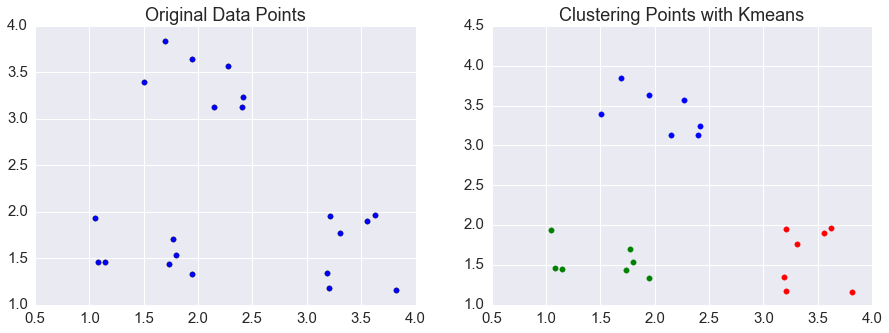

In [55]:
# First method: Kmeans

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# select the four predicators in iris, create the unsupervised form
k=3
X=Spectral(k)

# generate the possible range 
clusters =range(2,8)

clusterer = KMeans(n_clusters=k, random_state=42)
cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
silhouette_avg = silhouette_score(X, cluster_labels)


# Find the max silhouette score
#Num_cluster = [i+2 for i, j in enumerate(all_score) if j == max(all_score)]

   
print("When n_clusters =", k,
          ", we have the silhouette_score =", silhouette_avg)

#answer=str(Num_cluster).strip('[]')

# Make a pairwise scatter plot
clust_result = KMeans(n_clusters=k, random_state=10)
cluster_labels = clust_result.fit_predict(X)
indicator=np.loadtxt(cluster_labels,dtype='int32')
ID=indicator.tolist()
IDX=np.asarray(ID) 


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(data[:,0],data[:,1],s=30)
plt.title('Original Data Points')

plt.subplot(1,2,2)
for i in range(len(IDX)):
    if IDX[i] == 0:
        plt.scatter(data[i,0],data[i,1],color='red',s=30)
    elif IDX[i] == 1:
        plt.scatter(data[i,0],data[i,1],color = 'blue',s=30)
    elif IDX[i] == 2:
        plt.scatter(data[i,0],data[i,1],color = 'green',s=30)
plt.title('Clustering Points with Kmeans')
plt.show()




In [ ]:
def circle(n):
    x=np.linspace(-3,3,1000)
    

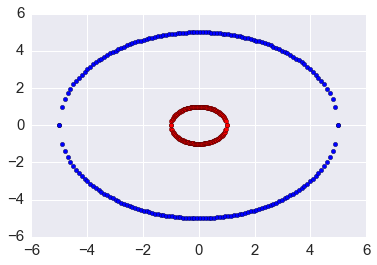

In [41]:
x=np.linspace(-5,5,100)
y=np.sqrt(25-x**2)
y2=-np.sqrt(25-x**2)
plt.scatter(x,y)
plt.scatter(x,y2)
plt

x2=np.linspace(-1,1,100)
y21=np.sqrt(1-x2**2)
y22=-np.sqrt(1-x2**2)
plt.scatter(x2,y21,c='red')
plt.scatter(x2,y22,c='red')

df=np.zeros((400,2))





In [26]:
for i in range(2,5):
    print(i)

2
3
4


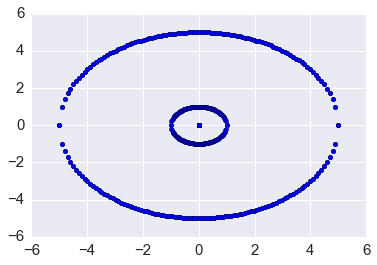

In [42]:
df=np.zeros((400,2))
for i in range(100):
    df[i,0]=x[i]
    df[i,1]=y[i]
for i in range(100,200):
    df[i,0]=x[i-100]
    df[i,1]=y2[i-100]
plt.scatter(df[:,0],df[:,1])


for i in range(200,300):
    df[i,0]=x2[i-200]
    df[i,1]=y21[i-200]
for i in range(300,400):
    df[i,0]=x2[i-300]
    df[i,1]=y22[i-300]

plt.scatter(df[:,0],df[:,1])


In [30]:
df

array([[-3.        ,  0.        ],
       [-2.93939394,  0.59996939],
       [-2.87878788,  0.84414474],
       [-2.81818182,  1.02851895],
       [-2.75757576,  1.18142962],
       [-2.6969697 ,  1.31390808],
       [-2.63636364,  1.4316378 ],
       [-2.57575758,  1.5380094 ],
       [-2.51515152,  1.63524092],
       [-2.45454545,  1.72487872],
       [-2.39393939,  1.80805259],
       [-2.33333333,  1.88561808],
       [-2.27272727,  1.95824175],
       [-2.21212121,  2.02645497],
       [-2.15151515,  2.09068949],
       [-2.09090909,  2.15130174],
       [-2.03030303,  2.20858996],
       [-1.96969697,  2.26280663],
       [-1.90909091,  2.31416765],
       [-1.84848485,  2.36285924],
       [-1.78787879,  2.40904326],
       [-1.72727273,  2.45286138],
       [-1.66666667,  2.49443826],
       [-1.60606061,  2.53388424],
       [-1.54545455,  2.57129739],
       [-1.48484848,  2.60676523],
       [-1.42424242,  2.64036617],
       [-1.36363636,  2.67217063],
       [-1.3030303 ,

When n_clusters = 2 , we have the silhouette_score = 0.360350647177


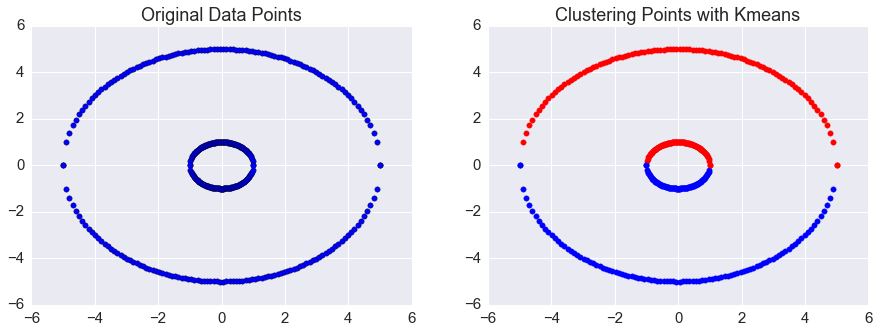

In [43]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# select the four predicators in iris, create the unsupervised form
k=2
X=df

# generate the possible range 
#clusters =range(2,8)

clusterer = KMeans(n_clusters=2, random_state=42)
cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
silhouette_avg = silhouette_score(X, cluster_labels)


# Find the max silhouette score
#Num_cluster = [i+2 for i, j in enumerate(all_score) if j == max(all_score)]

   
print("When n_clusters =", k,
          ", we have the silhouette_score =", silhouette_avg)

#answer=str(Num_cluster).strip('[]')

# Make a pairwise scatter plot
clust_result = KMeans(n_clusters=k, random_state=10)
cluster_labels = clust_result.fit_predict(X)
indicator=np.loadtxt(cluster_labels,dtype='int32')
ID=indicator.tolist()
IDX=np.asarray(ID) 


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(df[:,0],df[:,1],s=30)
plt.title('Original Data Points')

plt.subplot(1,2,2)
for i in range(len(IDX)):
    if IDX[i] == 0:
        plt.scatter(df[i,0],df[i,1],color='red',s=30)
    elif IDX[i] == 1:
        plt.scatter(df[i,0],df[i,1],color = 'blue',s=30)
#     elif IDX[i] == 2:
#         plt.scatter(data[i,0],data[i,1],color = 'green',s=30)
plt.title('Clustering Points with Kmeans')
plt.show()



/Users/apple/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/apple/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


When n_clusters = 2 , we have the silhouette_score = 0.548142515477


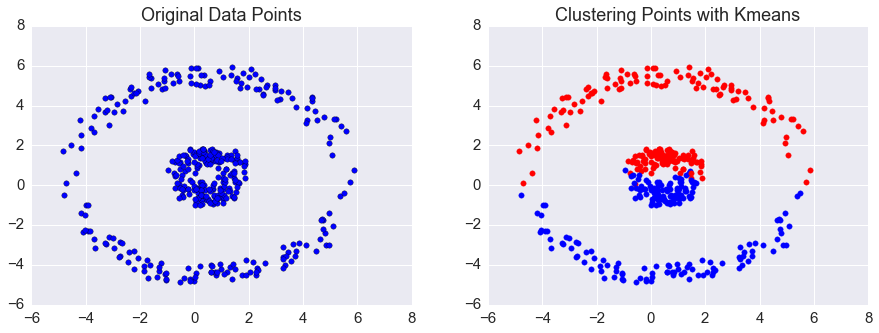

In [62]:
data = df+np.random.random((400,2))
affinity = CalculateAffinity(df)
k = 2

X=Spectral(k)

# generate the possible range 
clusters =range(2,8)

clusterer = KMeans(n_clusters=k, random_state=42)
cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
silhouette_avg = silhouette_score(X, cluster_labels)
   
print("When n_clusters =", k,
          ", we have the silhouette_score =", silhouette_avg)

#answer=str(Num_cluster).strip('[]')

# Make a pairwise scatter plot
clust_result = KMeans(n_clusters=k, random_state=10)
cluster_labels = clust_result.fit_predict(X)
indicator=np.loadtxt(cluster_labels,dtype='int32')
ID=indicator.tolist()
IDX=np.asarray(ID) 


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(data[:,0],data[:,1],s=30)
plt.title('Original Data Points')

plt.subplot(1,2,2)
for i in range(len(IDX)):
    if IDX[i] == 0:
        plt.scatter(data[i,0],data[i,1],color='red',s=30)
    elif IDX[i] == 1:
        plt.scatter(data[i,0],data[i,1],color = 'blue',s=30)
#     elif IDX[i] == 2:
#         plt.scatter(data[i,0],data[i,1],color = 'green',s=30)
plt.title('Clustering Points with Kmeans')
plt.show()



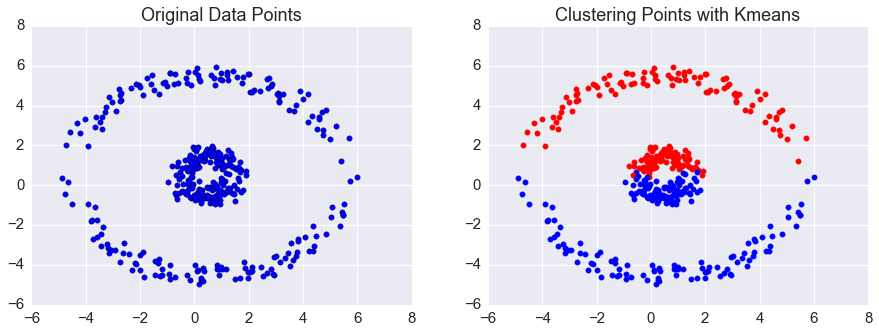

In [63]:
from sklearn.cluster import spectral_clustering
data=df+np.random.random((400,2))
affinity = CalculateAffinity(df)
labels = spectral_clustering(affinity, n_clusters=2, eigen_solver='arpack')

indicator=np.loadtxt(labels,dtype='int32')
ID=indicator.tolist()
IDX=np.asarray(ID) 


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(data[:,0],data[:,1],s=30)
plt.title('Original Data Points')

plt.subplot(1,2,2)
for i in range(len(IDX)):
    if IDX[i] == 0:
        plt.scatter(data[i,0],data[i,1],color='red',s=30)
    elif IDX[i] == 1:
        plt.scatter(data[i,0],data[i,1],color = 'blue',s=30)
#     elif IDX[i] == 2:
#         plt.scatter(data[i,0],data[i,1],color = 'green',s=30)
plt.title('Clustering Points with Kmeans')
plt.show()

In [56]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

###############################################################################
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

###############################################################################
# 4 circles
img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2 * np.random.randn(*img.shape)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())



(13004,)

In [57]:
data=graph
affinity = CalculateAffinity(data)
labels = spectral_clustering(affinity, n_clusters=4, eigen_solver='arpack')

indicator=np.loadtxt(labels,dtype='int32')
ID=indicator.tolist()
IDX=np.asarray(ID) 


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(data[:,0],data[:,1],s=30)
plt.title('Original Data Points')

plt.subplot(1,2,2)
for i in range(len(IDX)):
    if IDX[i] == 0:
        plt.scatter(data[i,0],data[i,1],color='red',s=30)
    elif IDX[i] == 1:
        plt.scatter(data[i,0],data[i,1],color = 'blue',s=30)
#     elif IDX[i] == 2:
#         plt.scatter(data[i,0],data[i,1],color = 'green',s=30)
plt.title('Clustering Points with Kmeans')
plt.show()

TypeError: 'coo_matrix' object is not subscriptable